In [1]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, m_e, epsilon_0, k, pi, c
from pathlib import Path
%reload_ext autoreload

sys.path.append('../')
sys.path.append('../src')
sys.path.append('../utils')

%aimport src.source
%aimport src.plots
%aimport src.mpi_job
%aimport prod_figures 

from src.source import Simu
from src.plots import plot_max_abs, plot_profiles, SimuData, plot_Dn_over_ellipse
from utils.plotting import set_size, annotate_subplots
from src.mpi_job import frequency_scan, density_scan, temp_scan, angle_scan, compare_O_and_X_mode
from prod_figures import example_profiles, n_crit, f_ce, R_res, gamma, vthe, freq_variation, density

figp = Path('../figures')

In [37]:
%autoreload 1
simu = Simu(    'test',
                B0=1.4,
                R0=1.0,
                a0=0.25,
                harmonic=2,
                theta_in=np.pi/2,
                omega_b=78e9 * 2 * np.pi,
                W0=0.02,
                Power_in=1,
                vmax=4,
                Nv=100,
                Nr=200,
                Ne0=1.0e19,
                Te0=2.0e3 * 1.602e-19,
                mode='O'
                )

In [38]:


print(n_crit(simu.omega_b))
f_ce(simu.B0, simu.R0, simu.R0 - simu.a0)/1e9, f_ce(simu.B0, simu.R0, simu.R0 + simu.a0)/1e9

7.54685281560393e+19


(52.25264776168834, 31.351588657013)

In [39]:
%autoreload 1
simu.compute()

iR 101
iR 100
iR 99
iR 98
iR 97
iR 96
iR 95
iR 94
iR 93
iR 92
iR 91
iR 90
iR 89


[0.98869347 1.00479015]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
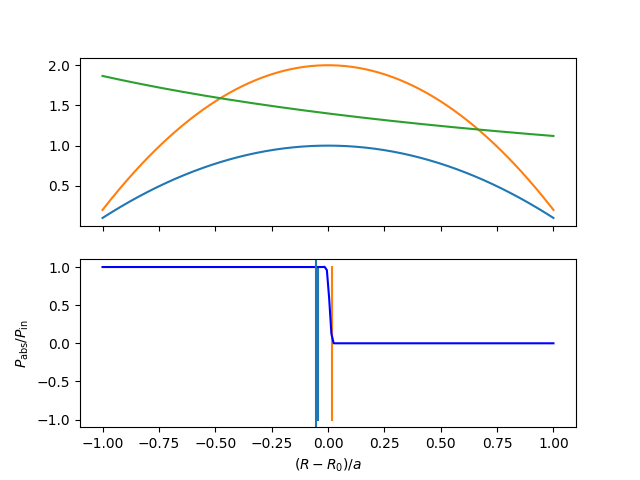

In [36]:
%autoreload 1
fig, axs = plt.subplots(2,1,sharex=True)
plot_profiles('test', axs=axs, show_analy=False, show_bounds=True)
_ = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=gamma(3*vthe(simu.Te0 / 1e3 / e)))
axs[-1].axvline((_ - simu.R0) / simu.a0)

abs_bound.npy not found
abs_bound.npy not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
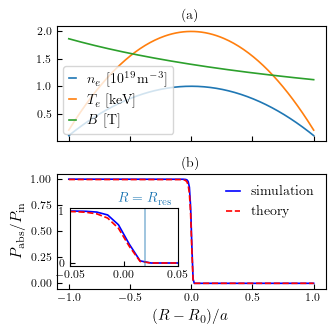

In [4]:
%autoreload 1
example_profiles()

### Study the impact of the Beam frequency

In [5]:
%aimport src.mpi_job
from src.mpi_job import frequency_scan, density_scan, temp_scan, angle_scan

abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found
abs_bound.npy not found


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
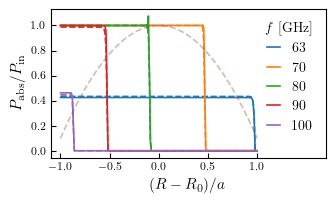

In [3]:
freq_variation()

### Density scan

['Ne0_0.2e19', 'Ne0_0.5e19', 'Ne0_1.0e19', 'Ne0_2.0e19']
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284
abs_bound.npy not found
1.9997795074572284


<AxesSubplot:xlabel='$(R - R_0)/a$', ylabel='$P_\\mathrm{abs}/P_\\mathrm{in}$'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
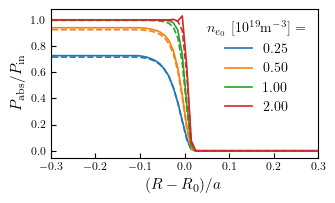

In [25]:
density()

### Temperature scan

1.0089233431680462
1.0275109497363435
1.047165253019626
1.06799234373399


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
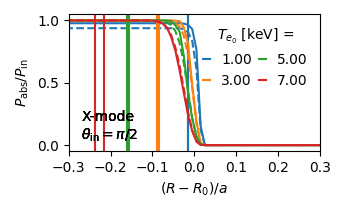

In [24]:
%autoreload 1
simus = temp_scan(perp=True)

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)//2):
    
    simu = Simu.load_pickle(simus[2*i].name)
    T = simu.Te0
    T_label = '{:.2f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=2, handlelength=0.5, columnspacing=0.5, frameon=False)
    
    ax.set_xlim(-0.3,0.3)
    
    annot = '{}-mode\n'.format(simu.mode)
    annot += r'$\theta_\mathrm{in}=\pi/2$'
    
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    
    gamm = gamma(3*vthe(simu.Te0 / 1e3 / e))
    print(gamm)
    _1 = R_res(simu.harmonic, simu.B0, simu.R0, simu.omega_b, gamma=gamma(3*vthe(simu.Te0 / 1e3 / e)))
    _2 = simu.abs_bounds[0]
    for _ in [_1, _2]:
        ax.axvline((_ - simu.R0) / simu.a0, color=l.get_color())
    
    plt.tight_layout()
#fig.savefig(figp / 'temp_scan_perp.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
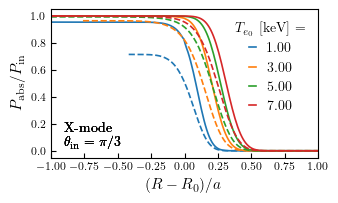

In [119]:
%autoreload 1
simus = temp_scan(perp=False)

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)//2):
    
    simu = Simu.load_pickle(simus[2*i].name)
    T = simu.Te0
    T_label = '{:.2f}'.format(T / 1e3 / 1.602e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=T_label)
    ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0) / a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$T_{e_0}$ [keV] =', ncol=1, handlelength=0.5, columnspacing=0.5,
              loc='upper right', frameon=False)
    
    ax.set_xlim(-1.0,1.0)
    
    annot = '{}-mode\n'.format(simu.mode)
    annot += r'$\theta_\mathrm{in}=\pi/3$'
    
    ax.text(0.05, 0.05, annot, ha='left', va='bottom', transform=ax.transAxes)
    #ax.text()
    plt.tight_layout()
fig.savefig(figp / 'temp_scan_oblique.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
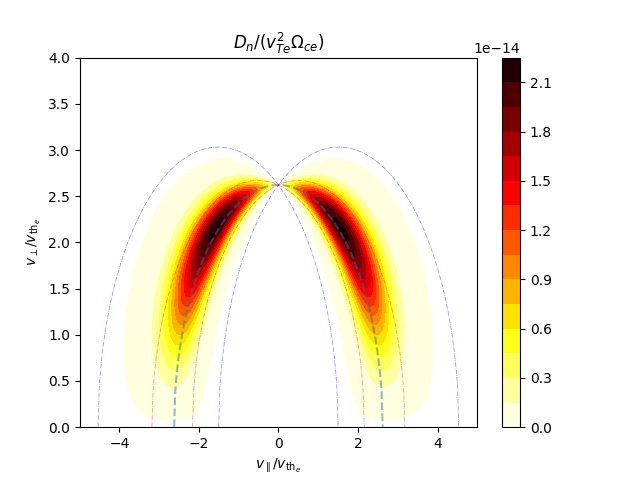

In [48]:
%autoreload 1
plt.style.use('default')
plot_Dn_over_ellipse('test4')

### Angle scan and velocity space

['theta_1.10', 'theta_1.26', 'theta_1.41', 'theta_1.57', 'theta_1.73', 'theta_1.88', 'theta_2.04']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
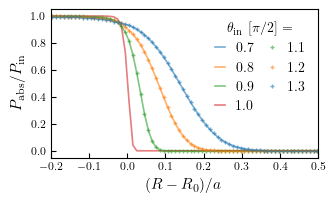

In [19]:
%autoreload 1
simus = angle_scan()

plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

cols = []
for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)

    t = simu.theta_in
    t_label = '{:.1f}'.format(t / pi * 2) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    if i <= len(simus)//2:
        ls = '-'
        l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=t_label, alpha=0.6)
        cols.append(l.get_color())
    else:
        ls = '+'
        l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=t_label, alpha=0.6, color=cols[2-i])
    
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(title=r'$\theta_\mathrm{in}$ [$\pi/2$] =', handlelength=.7, loc='upper right',
              ncol=2, columnspacing=1.0)
    ax.set_xlim(-0.2,0.5)
    #ax.text()
plt.tight_layout()
fig.savefig(figp / 'theta_variation_real_space.pdf')

7.516277389499254e-12
4.615838848496301e-12
2.808649712115974e-12
1.9394058959326076e-11
2.8086497121159737e-12
4.615838848496285e-12
7.516277389499259e-12


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
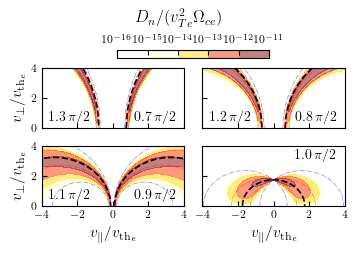

In [20]:
%autoreload 1
plt.style.use('../utils/tex.mplstyle')
fs = set_size(width='article', fraction=1, aspect_r=.7)
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=fs, constrained_layout=True)

def get_max_Dn(simus):
    Dn_max = 0
    for i in range(len(simus)):
        simu = Simu.load_pickle(simus[i].name)
        #Compute the position of maximum absorption and compare it to the ellipse
        Dn = simu.Dn
        dP_on_dR = np.diff(simu.vec_Power)
        iR_max = np.argmax(dP_on_dR)
        # print("iR_max", iR_max)
        Z = np.transpose(Dn[iR_max,:,:])
        if np.nanmax(Z) > Dn_max:
            Dn_max = np.nanmax(Z)
    return Dn_max

vmax = get_max_Dn(simus)

k = np.array([0,1,2,3,2,1,0])
for i in range(7):
    simu = simus[i]
    ax = axs.flatten()[k[i]]
    if i > len(simus)//2:
        cbar = False
        xpos = 0.05
        ha = 'left'
    else:
        cbar = True
        xpos = 0.95
        ha = 'right'
        
    if k[i]<3:
        ypos = 0.05
        va = 'bottom'
    else:
        ypos = 0.95
        va = 'top'
    
    im = plot_Dn_over_ellipse(simu.name, ax=ax, labels=False, cbar=False, plot_ellipse=True, vmin=vmax/1e4, vmax=vmax)
    ax.set_xlim(-4,4)
    ax.set_ylim(0,4)
    
    
    # theta annotation
    t = simu.theta_in
    t_label = '{:.1f}$\,\pi/2$'.format(t / pi * 2) 
    ax.text(xpos, ypos, t_label, va=va, ha=ha, transform=ax.transAxes)
    
fig.colorbar(im, ax=axs[:,:], location='top', shrink=0.5)
fig.suptitle("$D_{n}/(v_{Te}^2 \Omega_{ce})$")

for ax in axs[-1,:]:
    ax.set_xlabel("$v_{\parallel} / v_{\mathrm{th}_e}$")
for ax in axs[:,0]:
    ax.set_ylabel("$v_{\perp} / v_{\mathrm{th}_e}$")
    
#axs[1,0].legend(handlelength=0.5, ncol=2, columnspacing=0.5)
#plt.tight_layout()
fig.savefig(figp / 'Dn_vspace.pdf')

['mode_compar_0', 'mode_compar_1', 'mode_compar_2', 'mode_compar_3', 'mode_compar_4', 'mode_compar_5']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
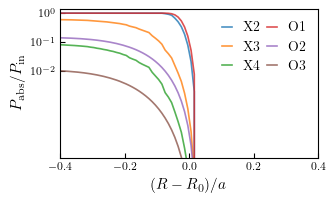

In [32]:
%autoreload 1
simus = compare_O_and_X_mode()
plt.style.use('../utils/tex.mplstyle')

fs = set_size(width='article')
fig, ax = plt.subplots(figsize=fs)

for i in range(len(simus)):
    
    simu = Simu.load_pickle(simus[i].name)

    mo = simu.mode
    har = simu.harmonic
    lab = '{}{}'.format(mo, har) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    R_norm = (vec_R - simu.R0) / simu.a0
    
    if mo=='O':
        ls = '-'
    elif mo=='X':
        ls = '-'

    l, = ax.plot(R_norm, (vec_Power[-1] - vec_Power)/vec_Power[-1], ls, label=lab, alpha=0.8)
       
    #ax.plot(R_norm, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$(R - R_0)/a$")
    ax.set_ylabel("$P_\mathrm{abs}/P_\mathrm{in}$")
    #ax.legend(["simulation","theory"])
    ax.legend(loc='upper right', ncol=2, handlelength=.7, columnspacing=0.5)
    ax.set_xlim(-0.4, 0.4)
    
    #ax.text()
    ax.set_yscale('log')
    ax.set_yticks([1, 0.1, 0.01])
    ax.set_ylim(bottom=1e-5)
plt.tight_layout()
fig.savefig(figp / 'mode_comparison.pdf')

In [34]:
A = np.array([0.9, 1.1]) * pi/2
B = pi - A
A, B

(array([1.41371669, 1.72787596]), array([1.72787596, 1.41371669]))

np.array([0.9, 1.1